In [1]:
import matplotlib.pylab as pl
%matplotlib inline
import minpy
from minpy.core import grad_and_loss as gradient_loss
import minpy.numpy as np
from minpy.context import set_context, cpu
set_context(cpu())

In [2]:
def to_np(f):
    def wrapper(*args, **kwargs):
        arguments = list(args)
        for index, value in enumerate(arguments):
            if isinstance(value, minpy.array.Array):
                arguments[index] = value.asnumpy()
        keyword_arguments = dict(kwargs)
        for key, value in keyword_arguments.items():
            if isinstance(value, minpy.array.Array): 
                keyword_arguments[key] = value.asnumpy()
        return f(*arguments, **keyword_arguments)
    return wrapper
def to_float(array):
    return array.asnumpy()[0]
@to_np
def plot(*args, **kwargs):
    return pl.plot(*args, **kwargs)

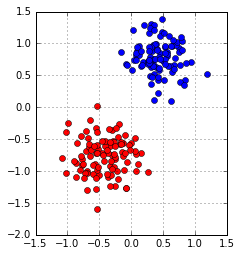

In [3]:
pl.gca().set_aspect('equal')
X_MEAN, Y_MEAN = 0.4, 0.8
STD = 0.25
N = 100
PX = np.random.normal(-X_MEAN, STD, N)
PY = np.random.normal(-Y_MEAN, STD, N)
p_array = np.array(list(list(point) for point in zip(PX, PY)))
PL = -np.ones((N, 1))
plot(PX, PY, 'ro')
QX = np.random.normal(X_MEAN, STD, N)
QY = np.random.normal(Y_MEAN, STD, N)
q_array = np.array(list(list(point) for point in zip(QX, QY)))
QL = np.ones((N, 1))
plot(QX, QY, 'bo')
pl.grid()

In [6]:
# W = np.ones((2, 1))
W = np.array([[-1], [1]])
b = np.zeros(1)
def forward(X, W, b):
    return np.dot(X, W) + b
def loss_function(Y, L):
    return np.sum((Y - L) ** 2) / float(Y.shape[0])
def gl(X, L):
    def _gl(W, b):
        outputs = forward(X, W, b)
        return loss_function(outputs, L)
    return gradient_loss(_gl, range(2))(W, b)

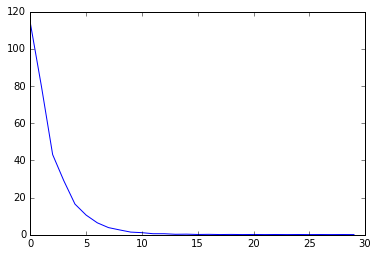

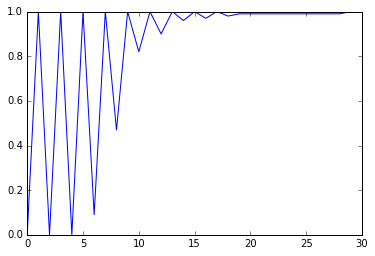

In [5]:
ITERATIONS = 30
LR = 0.1
loss_history = []
accuracy_history = []
for i in range(ITERATIONS):
    if i % 2 == 0:
        X, Y = p_array, PL
    else:
        X, Y = q_array, QL
    gradients, loss = gl(X, Y)
    loss = to_float(loss)
    loss_history.append(loss)

    dW, db = tuple(gradients)
    W -= LR * dW
    b -= LR * db
    
    outputs = forward(X, W, b)
    n = to_float(np.sum((outputs * Y > 0)))
    accuracy = n / float(Y.shape[0])
    accuracy_history.append(accuracy)

pl.figure()
pl.plot(range(ITERATIONS), loss_history)
pl.figure()
pl.plot(range(ITERATIONS), accuracy_history)